In [1]:
import pandas as pd
df = pd.read_csv('rba-dataset-renamed-desktop.csv')
df = df.head(30000)

In [2]:
# calculate the percentage of True and False values in bolean char'
value_counts_1 = df['is_login_success'].value_counts(normalize=True)
is_login_success_true = value_counts_1[True] * 100
is_login_success_false = value_counts_1[False] * 100
print("is_login_success")
print(f"Percentage of True values: {is_login_success_true:.2f}%")
print(f"Percentage of False values: {is_login_success_false:.2f}%")

value_counts_2 = df['is_attack_ip'].value_counts(normalize=True)
is_attack_ip_true  = value_counts_2[True] * 100
is_attack_ip_false = value_counts_2[False] * 100
print("is_attack_ip")
print(f"Percentage of True values: {is_attack_ip_true:.2f}%")
print(f"Percentage of False values: {is_attack_ip_false:.2f}%")

value_counts_3 = df['is_account_takeover'].value_counts(normalize=True)
is_account_takeover_true  = value_counts_3[True] * 100
is_account_takeover_false = value_counts_3[False] * 100
print("is_account_takeover")
print(f"Percentage of True values: {is_account_takeover_true:.2f}%")
print(f"Percentage of False values: {is_account_takeover_false:.2f}%")

is_login_success
Percentage of True values: 67.35%
Percentage of False values: 32.65%
is_attack_ip
Percentage of True values: 3.09%
Percentage of False values: 96.91%
is_account_takeover
Percentage of True values: 0.01%
Percentage of False values: 99.99%


In [3]:
### drop un-used column
df.drop(['round_trip', 'index', 'is_attack_ip', 'is_account_takeover', 'user_id', 'token', 'device_type', 'length'], axis=1, inplace=True)

In [4]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))


initial_eda(df)

Dimensions : 30000 rows, 10 columns
Total NA Values : 21 
                           Column Name  Data Type      #Distinct  NA Values
                       login_timestamp     object        30000          0
                            ip_address     object        17387          0
                               country     object           75          0
                                region     object          273         14
                                  city     object         1414          7
                                   asn      int64          792          0
                     user_agent_string     object          637          0
                               browser     object          167          0
                             os_detail     object           61          0
                      is_login_success       bool            2          0


In [5]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)


There are 8 categorical variables

The categorical variables are :

 ['login_timestamp', 'ip_address', 'country', 'region', 'city', 'user_agent_string', 'browser', 'os_detail']


In [6]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)


There are 2 numerical variables

The numerical variables are :

 ['asn', 'is_login_success']


In [7]:
from sklearn.model_selection import train_test_split

# X is the input variable
# Y is the output variable

X = df.drop(['is_login_success'], axis=1)
y = df['is_login_success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Save the training and testing sets to new CSV files
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

test_data.to_csv('test_data.csv', index=False)
train_data.to_csv('train_data.csv', index=False)

In [8]:
X_train.shape

(21000, 9)

In [9]:
import category_encoders as ce

# One-hot encode the categorical features
# encode categorical variables with ordinal encoding
# see def preprocess_data(df) above
encoder = ce.OneHotEncoder(cols= ['login_timestamp', 'ip_address', 'country', 'region', 'city', 'user_agent_string', 'browser', 'os_detail'])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
X_train.head()

,login_timestamp_1,login_timestamp_2,login_timestamp_3,login_timestamp_4,login_timestamp_5,login_timestamp_6,login_timestamp_7,login_timestamp_8,login_timestamp_9,login_timestamp_10,...,os_detail_48,os_detail_49,os_detail_50,os_detail_51,os_detail_52,os_detail_53,os_detail_54,os_detail_55,os_detail_56,os_detail_57
28465,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27622,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28376,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10917,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27234,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#X_test = pd.get_dummies(df, columns=['login_timestamp', 'ip_address', 'country', 'region', 'city', 'user_agent_string', 'browser', 'os_detail'], prefix=['login_timestamp', 'ip_address', 'country', 'region', 'city', 'user_agent_string', 'browser', 'os_detail'])
#X_test.head()

In [11]:
### Random Forest Classifier model with default parameters
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7296666666666667


In [12]:
### Gini importance 
# create the classifier with n_estimators = default
clf = RandomForestClassifier(random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [13]:
# Top 10 important features
feature_scores.head(10)

asn                     0.017551
country_2               0.009943
country_4               0.004708
country_6               0.003670
ip_address_23           0.003618
os_detail_1             0.003317
browser_1               0.002975
os_detail_16            0.002832
user_agent_string_49    0.002508
browser_2               0.002213
dtype: float64

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (36637).

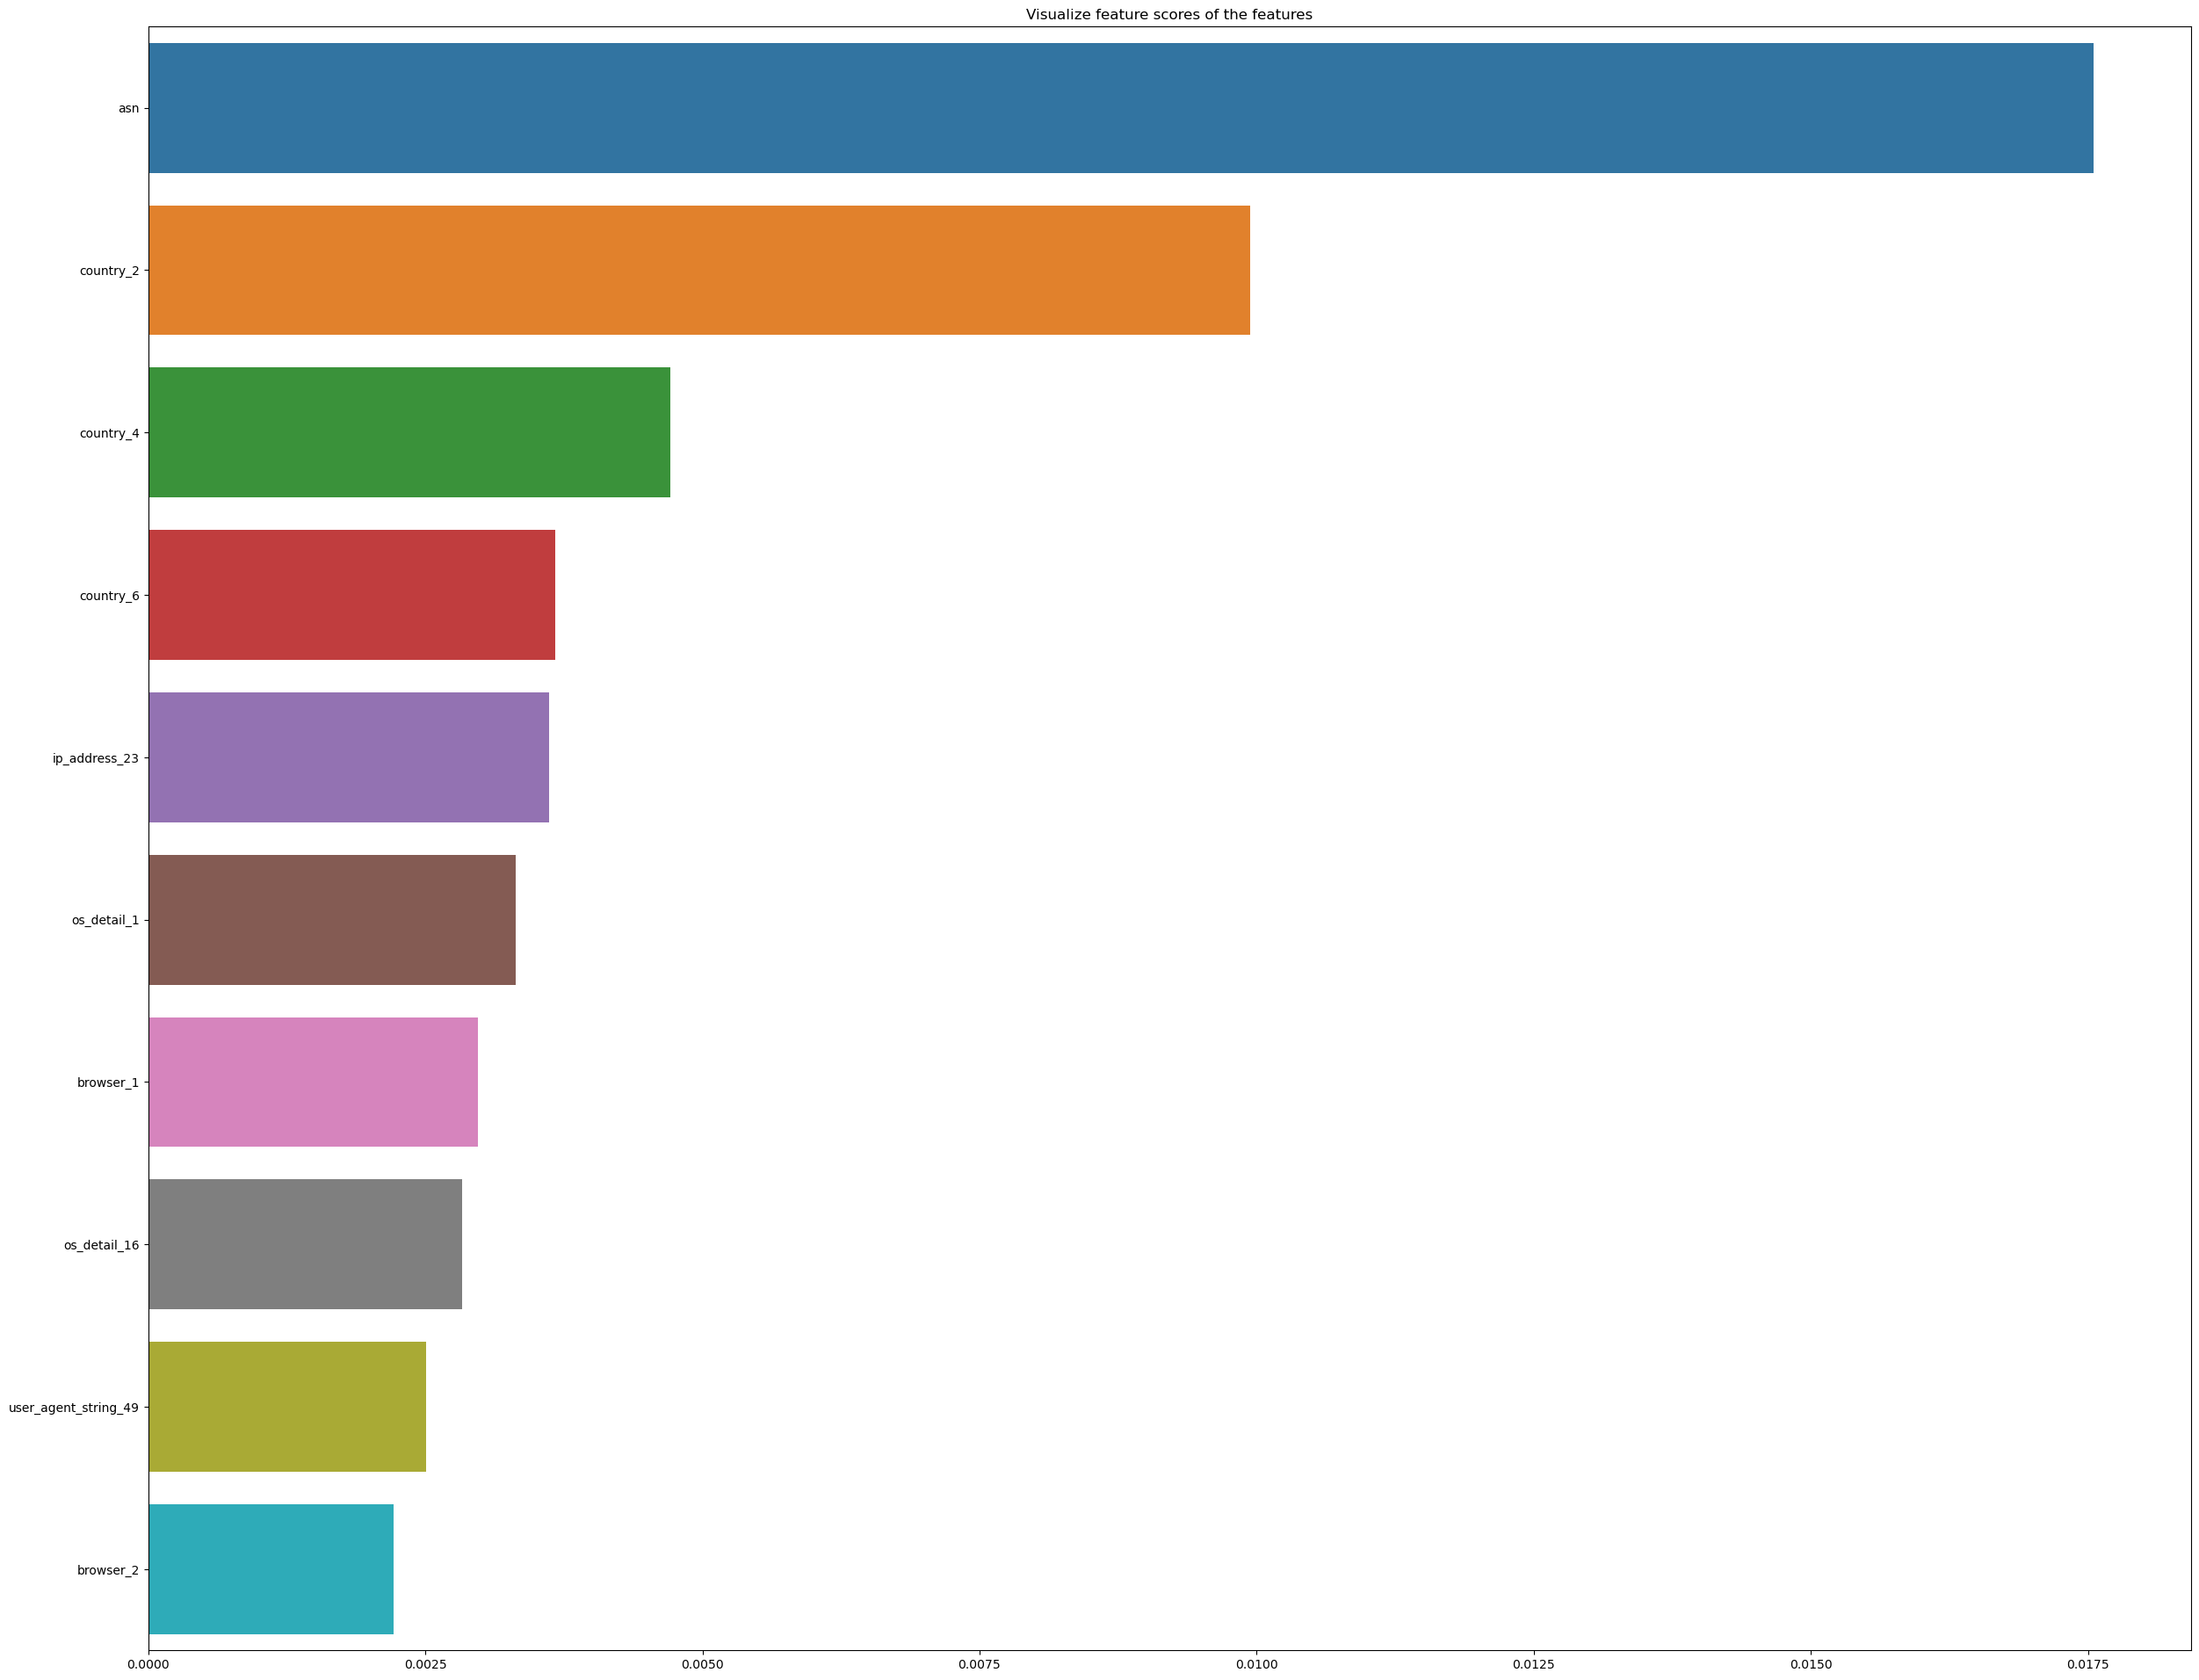

In [16]:
# Visualize feature scores of the features 
# Creating a seaborn bar plot

import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores.head(10), y=feature_scores.head(10).index, data=df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [17]:
### drop rest of column
df_feature = df.drop(['login_timestamp','region', 'city', 'user_agent_string', 'browser'], axis=1)
df_feature.to_csv('rba-dataset-feature.csv', index=False)

In [18]:
df_feature.shape

(30000, 5)